In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# take in the downloaded csv data over a 10-year period and merge it into one database
# export the database to a CSV for the rest of the group to download 
db15 = pd.read_csv('2015.csv')
db16 = pd.read_csv('2016.csv')
db17 = pd.read_csv('2017.csv')
db18 = pd.read_csv('2018.csv')
db19 = pd.read_csv('2019.csv')
db20 = pd.read_csv('2020.csv')
db21 = pd.read_csv('2021.csv')
db22 = pd.read_csv('2022.csv')
db23 = pd.read_csv('2023.csv')
db24 = pd.read_csv('2024.csv')
db25 = pd.read_csv('2025.csv')
# concatenating the data over each year into one dataframe 
frames = [db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25]
mergedResults = pd.concat(frames)
# merging the results into a CSV 
mergedResults.to_csv('Merged10yrdata.csv', index=False) 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'landing'),
  Text(1, 0, 'enroute'),
  Text(2, 0, 'takeoff'),
  Text(3, 0, 'approach'),
  Text(4, 0, 'initial climb'),
  Text(5, 0, 'maneuvering'),
  Text(6, 0, 'taxi'),
  Text(7, 0, 'standing'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'emergency descent'),
  Text(10, 0, 'uncontrolled descent'),
  Text(11, 0, 'pushback/tow'),
  Text(12, 0, 'after landing'),
  Text(13, 0, 'post-impact')])

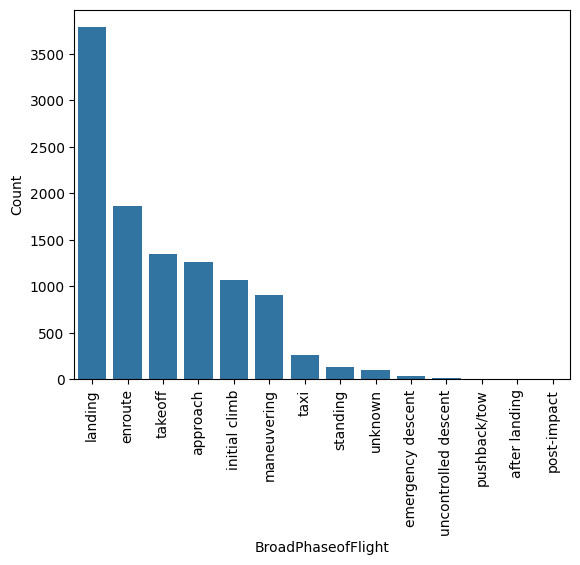

In [101]:
#Create a visualization that compares Makes of planes  and the broad phase of flight (approach, initial climb, landing) [STACKED BAR CHART]

# cleaning up the data 
sortedDB = pd.read_csv('Merged10yrdata.csv', low_memory=False)
sortedDB['Make'] = sortedDB['Make'].str.lower()
sortedDB['BroadPhaseofFlight'] = sortedDB['BroadPhaseofFlight'].str.lower()
# sort out incidents that only occurred in the US and are categorized as AIR
filteredOutCountry = sortedDB[(sortedDB['Country'] == 'United States') & (sortedDB['AirCraftCategory'] == 'AIR')]
# group by make and phase of flight 
results = filteredOutCountry[['EventDate','Make', 'BroadPhaseofFlight']].groupby(['Make', 'BroadPhaseofFlight']).count().reset_index()
# rename columns
results = results.rename(columns={'EventDate': 'Count'})
# results.to_csv('results.csv', index=False) 

sumByPhase = results.groupby('BroadPhaseofFlight')['Count'].sum().reset_index()

sumByPhase = sumByPhase.sort_values(by='Count', ascending=False)
# print(sumByPhase)

plot = sns.barplot(x='BroadPhaseofFlight', y='Count', data= sumByPhase)
plt.xticks(rotation=90)



                        Make BroadPhaseofFlight  Count  Total     Percent
0                     cessna            landing   1298   3148   41.232529
1                      piper            landing    630   1895   33.245383
2                     cessna            enroute    492   3148   15.628971
3                     cessna            takeoff    388   3148   12.325286
4                      piper            enroute    348   1895   18.364116
...                      ...                ...    ...    ...         ...
2388          gerald donovan            takeoff      1      1  100.000000
2389      gerald dan coppock            landing      1      1  100.000000
2390            george stone      initial climb      1      1  100.000000
2391  george matthew wagoner            landing      1      1  100.000000
2392        zwicker murray r            landing      1      1  100.000000

[2393 rows x 5 columns]
        Make    BroadPhaseofFlight  Count  Total    Percent
0     cessna               

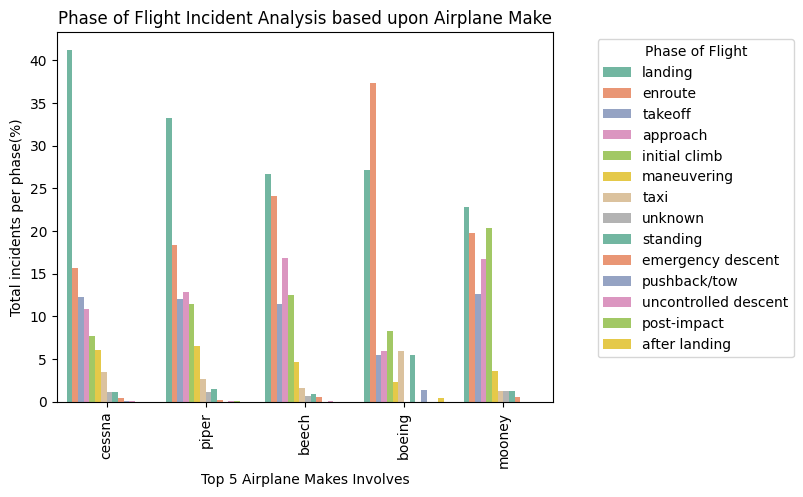

In [ ]:
# getting the total count of flights by make 
sumByMake = results.groupby(['Make','BroadPhaseofFlight'])['Count'].sum().reset_index()

sumByMake = sumByMake.sort_values(by='Count', ascending=False)
# calculating the sum of each make 
totalSum = sumByMake.groupby('Make')['Count'].sum().reset_index()
# sorting and column renaming 
totalSum = totalSum.sort_values(by='Count', ascending=False)
totalSum = totalSum.rename(columns={'Count': 'Total'})
sumByMake = sumByMake.merge(totalSum, on='Make')
# calculating the percentage of each phase 
sumByMake['Percent'] = (sumByMake['Count']/ sumByMake['Total']) *100
print(sumByMake)
# to visually display the data correctly getting the top 5 makes that are represented in the data 
top_makes = sumByMake.groupby('Make')['Count'].sum().nlargest(5).index
top5 = sumByMake[sumByMake['Make'].isin(top_makes)]

print(top5)
# creating the bar plot and setting the axis' labels and title
plot = sns.barplot(x='Make', y='Percent', hue='BroadPhaseofFlight', data=top5, palette='Set2')
plot.set_xlabel("Top 5 Airplane Makes Involves")
plot.set_ylabel("Total incidents per phase(%)")
plot.set_title("Phase of Flight Incident Analysis based upon Airplane Make")
plt.xticks(rotation=90)
plt.legend(title="Phase of Flight", loc= 'upper right',  bbox_to_anchor=(1.5, 1))



      Make BroadPhaseofFlight  Count  Total    Percent
0   airbus           approach      9     73  12.328767
1   airbus            enroute     38     73  52.054795
2   airbus      initial climb      5     73   6.849315
3   airbus            landing     10     73  13.698630
4   airbus       pushback/tow      1     73   1.369863
5   airbus           standing      1     73   1.369863
6   airbus            takeoff      6     73   8.219178
7   airbus               taxi      3     73   4.109589
8   boeing      after landing      1    220   0.454545
9   boeing           approach     13    220   5.909091
10  boeing            enroute     81    220  36.818182
11  boeing      initial climb     18    220   8.181818
12  boeing            landing     60    220  27.272727
13  boeing        maneuvering      5    220   2.272727
14  boeing       pushback/tow      3    220   1.363636
15  boeing           standing     12    220   5.454545
16  boeing            takeoff     14    220   6.363636
17  boeing

/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_30097/968263402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial['Make'] = commercial['Make'].str.split().str[0]
/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_30097/968263402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial['Make'] = commercial['Make'].str.split('-').str[0]


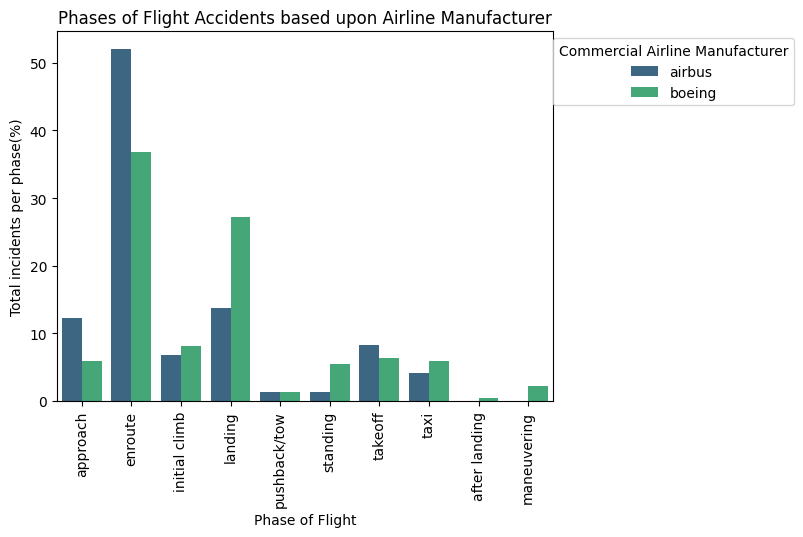

In [ ]:
# since our term project only focuses on commercial airlines, I narrowed down data reflecting commercial flights which are Boeing and Airbus
commercial = results[results['Make'].str.contains('Boeing|Airbus', case=False, na=False)]
# including the data that may contain hypenated airline makes 
commercial['Make'] = commercial['Make'].str.split().str[0]
commercial['Make'] = commercial['Make'].str.split('-').str[0]
# print(commercial)
# getting a sum which is grouped by the make 
sumByMake = commercial.groupby(['Make','BroadPhaseofFlight'])['Count'].sum().reset_index()

# sumByMake = sumByMake.sort_values(by='Count', ascending=False)
# getting a total sum to calculate the percentage 
totalSum = sumByMake.groupby('Make')['Count'].sum().reset_index()
# renaming columns 
totalSum = totalSum.rename(columns={'Count': 'Total'})
sumByMake = sumByMake.merge(totalSum, on='Make')
sumByMake['Percent'] = (sumByMake['Count']/ sumByMake['Total']) *100
print(sumByMake)
# creating the bar plot and renamed the axis' 
plot = sns.barplot(x='BroadPhaseofFlight', y='Percent', hue='Make', data=sumByMake, palette='viridis')
plot.set_xlabel("Phase of Flight")
plot.set_ylabel("Total incidents per phase(%)")
plot.set_title("Phases of Flight Accidents based upon Airline Manufacturer")
plt.xticks(rotation=90)

# # 9) Customize legend if necessary
plt.legend(title="Commercial Airline Manufacturer", loc= 'upper right',  bbox_to_anchor=(1.5, 1))

